## The contents include:

* 2. ID Conversion
* 3. KEGG Annotation and Enrichment
* 4. GO Annotation and Enrichment
* 5. Handling annotation in R


## 2. ID Conversion

In [1]:
BiocManager::install("org.Hs.eg.db")
library(org.Hs.eg.db)

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'org.Hs.eg.db'

installing the source package 'org.Hs.eg.db'


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'



In [3]:
myEIDs <- c("1", "10", "100", "1000", "37690", "1109", "6718") # Create vecotor of input Entrez IDs
mySymbols <- mget(myEIDs, org.Hs.egSYMBOL, ifnotfound=NA) # gets gene symbols 
mySymbols <-unlist(mySymbols)
mySymbols <- mget(myEIDs, org.Hs.egSYMBOL, ifnotfound=NA) # gets gene symbols 
mySymbols <-unlist(mySymbols)[!is.na(unlist(mySymbols))] # Removes the symbol with value NA
myEIDs <- unlist(mget(mySymbols, org.Hs.egSYMBOL2EG)) # gets Entrez IDs for input gene symbols
head(myEIDs)

A1BG   NAT2    ADA   CDH2 AKR1C4 AKR1D1 
   "1"   "10"  "100" "1000" "1109" "6718"

In [8]:
myGOIDs <- mget(c("1109", "6718"), org.Hs.egGO, ifnotfound=NA)
myGOIDs

$`1109`
$`1109`$`GO:0001523`
$`1109`$`GO:0001523`$GOID
[1] "GO:0001523"

$`1109`$`GO:0001523`$Evidence
[1] "TAS"

$`1109`$`GO:0001523`$Ontology
[1] "BP"


$`1109`$`GO:0006699`
$`1109`$`GO:0006699`$GOID
[1] "GO:0006699"

$`1109`$`GO:0006699`$Evidence
[1] "TAS"

$`1109`$`GO:0006699`$Ontology
[1] "BP"


$`1109`$`GO:0008209`
$`1109`$`GO:0008209`$GOID
[1] "GO:0008209"

$`1109`$`GO:0008209`$Evidence
[1] "TAS"

$`1109`$`GO:0008209`$Ontology
[1] "BP"


$`1109`$`GO:0015721`
$`1109`$`GO:0015721`$GOID
[1] "GO:0015721"

$`1109`$`GO:0015721`$Evidence
[1] "TAS"

$`1109`$`GO:0015721`$Ontology
[1] "BP"


$`1109`$`GO:0022900`
$`1109`$`GO:0022900`$GOID
[1] "GO:0022900"

$`1109`$`GO:0022900`$Evidence
[1] "IEA"

$`1109`$`GO:0022900`$Ontology
[1] "BP"


$`1109`$`GO:0044597`
$`1109`$`GO:0044597`$GOID
[1] "GO:0044597"

$`1109`$`GO:0044597`$Evidence
[1] "IMP"

$`1109`$`GO:0044597`$Ontology
[1] "BP"


$`1109`$`GO:0044598`
$`1109`$`GO:0044598`$GOID
[1] "GO:0044598"

$`1109`$`GO:0044598`$Evidence
[1] "IMP"

$`1109`$`GO:0044598`$Ontology
[1] "BP"


$`1109`$`GO:0071395`
$`1109`$`GO:0071395`$GOID
[1] "GO:0071395"

$`1109`$`GO:0071395`$Evidence
[1] "IDA"

$`1109`$`GO:0071395`$Ontology
[1] "BP"


$`1109`$`GO:0005737`
$`1109`$`GO:0005737`$GOID
[1] "GO:0005737"

$`1109`$`GO:0005737`$Evidence
[1] "TAS"

$`1109`$`GO:0005737`$Ontology
[1] "CC"


$`1109`$`GO:0005829`
$`1109`$`GO:0005829`$GOID
[1] "GO:0005829"

$`1109`$`GO:0005829`$Evidence
[1] "TAS"

$`1109`$`GO:0005829`$Ontology
[1] "CC"


$`1109`$`GO:0070062`
$`1109`$`GO:0070062`$GOID
[1] "GO:0070062"

$`1109`$`GO:0070062`$Evidence
[1] "HDA"

$`1109`$`GO:0070062`$Ontology
[1] "CC"


$`1109`$`GO:0001758`
$`1109`$`GO:0001758`$GOID
[1] "GO:0001758"

$`1109`$`GO:0001758`$Evidence
[1] "IDA"

$`1109`$`GO:0001758`$Ontology
[1] "MF"


$`1109`$`GO:0004033`
$`1109`$`GO:0004033`$GOID
[1] "GO:0004033"

$`1109`$`GO:0004033`$Evidence
[1] "TAS"

$`1109`$`GO:0004033`$Ontology
[1] "MF"


$`1109`$`GO:0009055`
$`1109`$`GO:0009055`$GOID
[1] "GO:0009055"

$`1109`$`GO:0009055`$Evidence
[1] "TAS"

$`1109`$`GO:0009055`$Ontology
[1] "MF"


$`1109`$`GO:0015125`
$`1109`$`GO:0015125`$GOID
[1] "GO:0015125"

$`1109`$`GO:0015125`$Evidence
[1] "TAS"

$`1109`$`GO:0015125`$Ontology
[1] "MF"


$`1109`$`GO:0016655`
$`1109`$`GO:0016655`$GOID
[1] "GO:0016655"

$`1109`$`GO:0016655`$Evidence
[1] "IDA"

$`1109`$`GO:0016655`$Ontology
[1] "MF"


$`1109`$`GO:0047023`
$`1109`$`GO:0047023`$GOID
[1] "GO:0047023"

$`1109`$`GO:0047023`$Evidence
[1] "IDA"

$`1109`$`GO:0047023`$Ontology
[1] "MF"


$`1109`$`GO:0047743`
$`1109`$`GO:0047743`$GOID
[1] "GO:0047743"

$`1109`$`GO:0047743`$Evidence
[1] "IEA"

$`1109`$`GO:0047743`$Ontology
[1] "MF"



$`6718`
$`6718`$`GO:0006699`
$`6718`$`GO:0006699`$GOID
[1] "GO:0006699"

$`6718`$`GO:0006699`$Evidence
[1] "IDA"

$`6718`$`GO:0006699`$Ontology
[1] "BP"


$`6718`$`GO:0006699`
$`6718`$`GO:0006699`$GOID
[1] "GO:0006699"

$`6718`$`GO:0006699`$Evidence
[1] "TAS"

$`6718`$`GO:0006699`$Ontology
[1] "BP"


$`6718`$`GO:0006707`
$`6718`$`GO:0006707`$GOID
[1] "GO:0006707"

$`6718`$`GO:0006707`$Evidence
[1] "IDA"

$`6718`$`GO:0006707`$Ontology
[1] "BP"


$`6718`$`GO:0007586`
$`6718`$`GO:0007586`$GOID
[1] "GO:0007586"

$`6718`$`GO:0007586`$Evidence
[1] "IDA"

$`6718`$`GO:0007586`$Ontology
[1] "BP"


$`6718`$`GO:0008207`
$`6718`$`GO:0008207`$GOID
[1] "GO:0008207"

$`6718`$`GO:0008207`$Evidence
[1] "IDA"

$`6718`$`GO:0008207`$Ontology
[1] "BP"


$`6718`$`GO:0008209`
$`6718`$`GO:0008209`$GOID
[1] "GO:0008209"

$`6718`$`GO:0008209`$Evidence
[1] "IDA"

$`6718`$`GO:0008209`$Ontology
[1] "BP"


$`6718`$`GO:0030573`
$`6718`$`GO:0030573`$GOID
[1] "GO:0030573"

$`6718`$`GO:0030573`$Evidence
[1] "IEA"

$`6718`$`GO:0030573`$Ontology
[1] "BP"


$`6718`$`GO:0055114`
$`6718`$`GO:0055114`$GOID
[1] "GO:0055114"

$`6718`$`GO:0055114`$Evidence
[1] "IDA"

$`6718`$`GO:0055114`$Ontology
[1] "BP"


$`6718`$`GO:0005829`
$`6718`$`GO:0005829`$GOID
[1] "GO:0005829"

$`6718`$`GO:0005829`$Evidence
[1] "IDA"

$`6718`$`GO:0005829`$Ontology
[1] "CC"


$`6718`$`GO:00

## 3. KEGG Annotation and enrichment

In [9]:
BiocManager::install("KEGG.db")
BiocManager::install("KEGGREST")
BiocManager::install("clusterProfiler")  # for enrichment

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'KEGG.db'

installing the source package 'KEGG.db'


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'KEGGREST'



package 'KEGGREST' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpOw4V8V\downloaded_packages


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'clusterProfiler'



package 'clusterProfiler' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpOw4V8V\downloaded_packages


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'



In [10]:
library(KEGG.db) # loads the  library


KEGG.db contains mappings based on older data because the original
  resource was removed from the the public domain before the most
  recent update was produced. This package should now be considered
  deprecated and future versions of Bioconductor may not have it
  available.  Users who want more current data are encouraged to look
  at the KEGGREST or reactome.db packages




In [11]:
myEIDs <- c("1109", "6718") # Create vecotor of input Entrez IDs
kegg <- as.character(unlist(mget(as.character(myEIDs), KEGGEXTID2PATHID, ifnotfound=NA)))
kegg <- sapply(strsplit(kegg, "hsa"), "[[", 2)
myPath <- unlist(mget(kegg, KEGGPATHID2NAME, ifnotfound=list(NA)))
myPath
KEGGPATHID2EXTID$hsa00140
KEGGPATHID2EXTID$sce00100

00120 
              "Primary bile acid biosynthesis" 
                                         00140 
                "Steroid hormone biosynthesis" 
                                         00980 
"Metabolism of xenobiotics by cytochrome P450" 
                                         01100 
                          "Metabolic pathways" 
                                         00120 
              "Primary bile acid biosynthesis" 
                                         00140 
                "Steroid hormone biosynthesis" 
                                         01100 
                          "Metabolic pathways"

[1] "100510686" "10720"     "10941"     "1109"      "1312"      "1543"     
 [7] "1545"      "1551"      "1576"      "1577"      "1581"      "1583"     
[13] "1584"      "1585"      "1586"      "1588"      "1589"      "1645"     
[19] "1646"      "3283"      "3284"      "3290"      "3291"      "3292"     
[25] "3293"      "3294"      "412"       "51144"     "51478"     "54490"    
[31] "54575"     "54576"     "54577"     "54578"     "54579"     "54600"    
[37] "54657"     "54658"     "54659"     "574537"    "64816"     "6715"     
[43] "6716"      "6718"      "6783"      "6820"      "7363"      "7364"     
[49] "7365"      "7366"      "7367"      "7923"      "79644"     "79799"    
[55] "8630"      "8644"      "9420"

[1] "YCR048W" "YGL001C" "YGL012W" "YGR060W" "YGR175C" "YHR007C" "YHR072W"
 [8] "YHR190W" "YLR056W" "YLR100W" "YML008C" "YMR015C" "YMR202W" "YNL280C"
[15] "YNR019W"

#### "KEFFREST"
The `KEGGREST` library can query the KEGG pathway database via the KEGG REST server for all the genes, enzymes, compounds, and reactions that are involved in the interactions in the desired pathway.

In [16]:
library(KEGGREST)
genes <- keggGet("hsa00140")
genes[[1]]
genes[[1]]$NAME
genes[[1]]$GENE

$ENTRY
   Pathway 
"hsa00140" 

$NAME
[1] "Steroid hormone biosynthesis - Homo sapiens (human)"

$DESCRIPTION
[1] "Steroid hormones derived from cholesterol are a class of biologically active compounds in vertebrates. The cholesterol side-chain cleavage enzyme CYP11A1 catalyzes conversion of cholesterol, a C27 compound, to the first C21 steroid, pregnenolone, which is converted by a bifunctional enzyme complex to the gestagen hormone, progesterone [MD:M00107]. Pregnenolone and progesterone are the starting materials for the three groups of steroids: C21 steroids of glucocorticoids and mineralocorticoids, C19 steroids of androgens, and C18 steroids of estrogens. (i) Progesterone is converted by hydroxylations at carbons 21 and 11 to corticosterone, which is further modified by hydroxylation and oxydoreduction at carbon 18 to yield aldosterone, a mineralcorticoid [MD:M00108]. Cortisol, the main glucocorticoid, is formed from 17alpha-hydroxyprogesterone with 11-deoxycortisol as an intermediate [MD:M00109]. (ii) Male hormone testosterone is formed from pregnenolone by two pathways, delta5 pathway via dehydroepiandrosterone and delta4 pathway via androstenedione [MD:M00110]. The enzyme CYP17A1 is responsible for the 17,20 lyase and 17alpha-hydroxylase activities in respective pathways. (iii) Female hormones estrone and estradiol are formed from testosterone and 4-androstene-3,17-dione by oxidative removal of the C19 methyl group and subsequent aromatization of ring A [MD:M00111]. In addition to these three groups, recent studies show that there is another group, termed neurosteroids, synthesized in the brain rather than the peripheral endocrine gland."

$CLASS
[1] "Metabolism; Lipid metabolism"

$PATHWAY_MAP
                      hsa00140 
"Steroid hormone biosynthesis" 

$MODULE
                                                                                        hsa_M00107 
       "Steroid hormone biosynthesis, cholesterol => prognenolone => progesterone [PATH:hsa00140]" 
                                                                                        hsa_M00108 
    "C21-Steroid hormone biosynthesis, progesterone => corticosterone/aldosterone [PATH:hsa00140]" 
                                                                                        hsa_M00109 
            "C21-Steroid hormone biosynthesis, progesterone => cortisol/cortisone [PATH:hsa00140]" 
                                                                                        hsa_M00110 
"C19/C18-Steroid hormone biosynthesis, pregnenolone => androstenedione => estrone [PATH:hsa00140]" 

$NETWORK
$NETWORK$NETWORK
[1] "nt06019  Steroid hormone biosynthesis"

$NETWORK$ELEMENT
 [1] "N00309  Cortisone reduction"                                                   
 [2] "N00338  Steroid hormone biosynthesis, progesterone to cortisol/cortisone"      
 [3] "N00339  Steroid hormone biosynthesis, progesterone to aldosterone"             
 [4] "N00759  Steroid hormone biosynthesis, cholesterol to prognenolone/progesterone"
 [5] "N00760  CYP11B1 deficiency in steroid hormone biosynthesis"                    
 [6] "N00761  CYP21A2 deficiency in steroid hormone biosynthesis"                    
 [7] "N00762  CYP17A1 deficiency in steroid hormone biosynthesis"                    
 [8] "N00763  HSD3B2 deficiency in steroid hormone biosynthesis"                     
 [9] "N00764  CYP11A1 deficiency in steroid hormone biosynthesis"                    
[10] "N00773  HSD11B2 deficiency in steroid hormone biosynthesis"                    
[11] "N00774  CYP11B2 deficiency in steroid hormone biosynthesis"                    


$DISEASE
                                                                          H00134 
                                                           "X-linked ichthyosis" 
                                                                          H00216 
                                                "Congenital adrenal hyperplasia" 
                    

[1] "Steroid hormone biosynthesis - Homo sapiens (human)"

[1] "1583"                                                                                                                                   
  [2] "CYP11A1; cytochrome P450 family 11 subfamily A member 1 [KO:K00498] [EC:1.14.15.6]"                                                     
  [3] "1586"                                                                                                                                   
  [4] "CYP17A1; cytochrome P450 family 17 subfamily A member 1 [KO:K00512] [EC:1.14.14.19 1.14.14.32]"                                         
  [5] "412"                                                                                                                                    
  [6] "STS; steroid sulfatase [KO:K01131] [EC:3.1.6.2]"                                                                                        
  [7] "6820"                                                                                                                                   
  [8] "SULT2B1; sulfotransferase family 2B member 1 [KO:K01015] [EC:2.8.2.2]"                                                                  
  [9] "1589"                                                                                                                                   
 [10] "CYP21A2; cytochrome P450 family 21 subfamily A member 2 [KO:K00513] [EC:1.14.14.16]"                                                    
 [11] "3283"                                                                                                                                   
 [12] "HSD3B1; hydroxy-delta-5-steroid dehydrogenase, 3 beta- and steroid delta-isomerase 1 [KO:K00070] [EC:1.1.1.145 5.3.3.1]"                
 [13] "3284"                                                                                                                                   
 [14] "HSD3B2; hydroxy-delta-5-steroid dehydrogenase, 3 beta- and steroid delta-isomerase 2 [KO:K00070] [EC:1.1.1.145 5.3.3.1]"                
 [15] "6715"                                                                                                                                   
 [16] "SRD5A1; steroid 5 alpha-reductase 1 [KO:K12343] [EC:1.3.1.22]"                                                                          
 [17] "6716"                                                                                                                                   
 [18] "SRD5A2; steroid 5 alpha-reductase 2 [KO:K12344] [EC:1.3.1.22]"                                                                          
 [19] "79644"                                                                                                                                  
 [20] "SRD5A3; steroid 5 alpha-reductase 3 [KO:K12345] [EC:1.3.1.22 1.3.1.94]"                                                                 
 [21] "1646"                                                                                                                                   
 [22] "AKR1C2; aldo-keto reductase family 1 member C2 [KO:K00089] [EC:1.1.1.213 1.1.1.357]"                                                    
 [23] "8644"                                                                                                                                   
 [24] "AKR1C3; aldo-keto reductase family 1 member C3 [KO:K04119] [EC:1.1.1.51 1.1.1.188 1.1.1.213 1.1.1.357]"                                 
 [25] "1584"                                                                                                                                   
 [26] "CYP11B1; cytochrome P450 family 11 subfamily B member 1 [KO:K00497] [EC:1.14.15.4]"                                                     
 [27] "1585"                                                                                                                                   
 [28] "CYP11B2; cytochrome P450 family 11 subfamily B member 2 [KO:K07433] [EC:1.14.15.4 1.14.15.5]"              

In [17]:
query <- keggGet("hsa:10458")
query[[1]]
query[[1]]$DEFINITION
query[[1]]$PATHWAY

$ENTRY
    CDS 
"10458" 

$NAME
[1] "BAIAP2, BAP2, FLAF3, IRSP53"

$DEFINITION
[1] "(RefSeq) BAR/IMD domain containing adaptor protein 2"

$ORTHOLOGY
                     K05627 
"BAI1-associated protein 2" 

$ORGANISM
                   hsa 
"Homo sapiens (human)" 

$PATHWAY
                               hsa04520                                hsa04810 
                    "Adherens junction"      "Regulation of actin cytoskeleton" 
                               hsa05130                                hsa05135 
"Pathogenic Escherichia coli infection"                    "Yersinia infection" 

$BRITE
 [1] "KEGG Orthology (KO) [BR:hsa00001]"                       
 [2] " 09140 Cellular Processes"                               
 [3] "  09144 Cellular community - eukaryotes"                 
 [4] "   04520 Adherens junction"                              
 [5] "    10458 (BAIAP2)"                                      
 [6] "  09142 Cell motility"                                   
 [7] " 

[1] "(RefSeq) BAR/IMD domain containing adaptor protein 2"

hsa04520                                hsa04810 
                    "Adherens junction"      "Regulation of actin cytoskeleton" 
                               hsa05130                                hsa05135 
"Pathogenic Escherichia coli infection"                    "Yersinia infection"

In [18]:
query3 <- keggGet("hsa05130", "image")
library(png)
writePNG(query3, "imagepath.png")

### "reactome.db"

In [19]:
BiocManager::install("reactome.db")
library(reactome.db)

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'reactome.db'

installing the source package 'reactome.db'


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'



In [21]:
xx <- as.list(reactomeEXTID2PATHID)
xx['100']

yy <- as.list(reactomePATHID2EXTID)
yy['R-HSA-114608']

zz <- as.list(reactomePATHID2NAME)
zz['R-HSA-114608']

$`100`
[1] "R-HSA-1430728" "R-HSA-15869"   "R-HSA-74217"   "R-HSA-8956321"

$`R-HSA-114608`
  [1] "1"      "10184"  "10257"  "10447"  "10487"  "10490"  "1072"   "10916" 
  [9] "1191"   "12"     "135228" "139322" "1521"   "1675"   "1893"   "1950"  
 [17] "197"    "2"      "213"    "2153"   "2157"   "2162"   "2243"   "2244"  
 [25] "226"    "2266"   "2277"   "22915"  "22927"  "23052"  "2316"   "2335"  
 [33] "259215" "2621"   "27154"  "29106"  "29789"  "308"    "3082"   "3273"  
 [41] "3309"   "334"    "335"    "3479"   "3481"   "350"    "351"    "3671"  
 [49] "3674"   "3690"   "3699"   "3700"   "374354" "3827"   "3920"   "3959"  
 [57] "5004"   "5005"   "5054"   "5099"   "51097"  "51368"  "5154"   "5155"  
 [65] "51571"  "51706"  "5175"   "5196"   "5216"   "5265"   "5267"   "5340"  
 [73] "5341"   "5345"   "54495"  "54676"  "5473"   "5478"   "54863"  "5552"  
 [81] "55664"  "5627"   "5660"   "5768"   "5874"   "5919"   "6403"   "6414"  
 [89] "66005"  "6647"   "6678"   "6694"   "6813"   "7018"   "7040"   "7042"  
 [97] "7043"   "7044"   "7057"   "7076"   "7078"   "7094"   "710"    "7114"  
[105] "7123"   "7273"   "7277"   "7414"   "7422"   "7423"   "7424"   "7450"  
[113] "7873"   "78991"  "801"    "805"    "808"    "81"     "813"    "83706" 
[121] "8407"   "87"     "88"     "928"    "94121"  "948"    "967"    "9749"  
[129] "9948"

$`R-HSA-114608`
[1] "Homo sapiens: Platelet degranulation "

### "GenesetDatabase"

In [22]:
BiocManager::install("EGSEAdata")
library(EGSEAdata)

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'EGSEAdata'

installing the source package 'EGSEAdata'


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'



In [ ]:
egsea.data()
gsetdb.human[[3]]

#### Enrichment

In [14]:
library(clusterProfiler)
data(gcSample)
genes <-gcSample[[4]] # a list of five sets
head(genes)
kegg_enrichment <- enrichKEGG(genes, pvalueCutoff = 0.01)
kegg_enrichment
as.data.frame(kegg_enrichment)

[1] "5573"  "7453"  "5245"  "23450" "6500"  "4926"

#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 kegg 
#...@gene 	 chr [1:838] "5573" "7453" "5245" "23450" "6500" "4926" "6427" "813" ...
#...pvalues adjusted by 'BH' with cutoff <0.01 
#...6 enriched terms found
'data.frame':	6 obs. of  9 variables:
 $ ID         : chr  "hsa04110" "hsa05215" "hsa03030" "hsa04068" ...
 $ Description: chr  "Cell cycle" "Prostate cancer" "DNA replication" "FoxO signaling pathway" ...
 $ GeneRatio  : chr  "20/398" "17/398" "10/398" "19/398" ...
 $ BgRatio    : chr  "124/7978" "97/7978" "36/7978" "131/7978" ...
 $ pvalue     : num  2.81e-06 4.97e-06 6.74e-06 2.40e-05 3.00e-05 ...
 $ p.adjust   : num  0.000652 0.000652 0.000652 0.001738 0.001738 ...
 $ qvalue     : num  0.000523 0.000523 0.000523 0.001394 0.001394 ...
 $ geneID     : chr  "6500/9184/4172/994/4175/4171/1387/10274/8697/902/4616/5591/4176/8881/7043/983/1022/1028/891/4173" "2950/1387/5159/5604/5156/596/4318/3551/367/2260/5595/5295/10000/6935/6655/90993/8

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04110,hsa04110,Cell cycle,20/398,124/7978,2.806324e-06,0.0006515282,0.0005226415,6500/9184/4172/994/4175/4171/1387/10274/8697/902/4616/5591/4176/8881/7043/983/1022/1028/891/4173,20
hsa05215,hsa05215,Prostate cancer,17/398,97/7978,4.969258e-06,0.0006515282,0.0005226415,2950/1387/5159/5604/5156/596/4318/3551/367/2260/5595/5295/10000/6935/6655/90993/80310,17
hsa03030,hsa03030,DNA replication,10/398,36/7978,6.739947e-06,0.0006515282,0.0005226415,5425/4172/4175/4171/10535/5984/2237/4176/54107/4173,10
hsa04068,hsa04068,FoxO signaling pathway,19/398,131/7978,2.399718e-05,0.0017377757,0.0013940052,7874/5571/10769/1387/5604/901/5106/4616/8660/3551/7043/5595/5295/10000/6655/3643/891/10365/6648,19
hsa01521,hsa01521,EGFR tyrosine kinase inhibitor resistance,14/398,79/7978,2.996165e-05,0.0017377757,0.0013940052,5159/5604/558/5156/596/9470/5595/7422/5295/10000/4763/6655/80310/1978,14
hsa04910,hsa04910,Insulin signaling pathway,18/398,137/7978,1.460396e-04,0.0070585797,0.0056622364,5573/5571/5590/6720/5604/5106/5577/5507/8660/3551/9470/5595/5295/10000/6655/5576/3643/1978,18


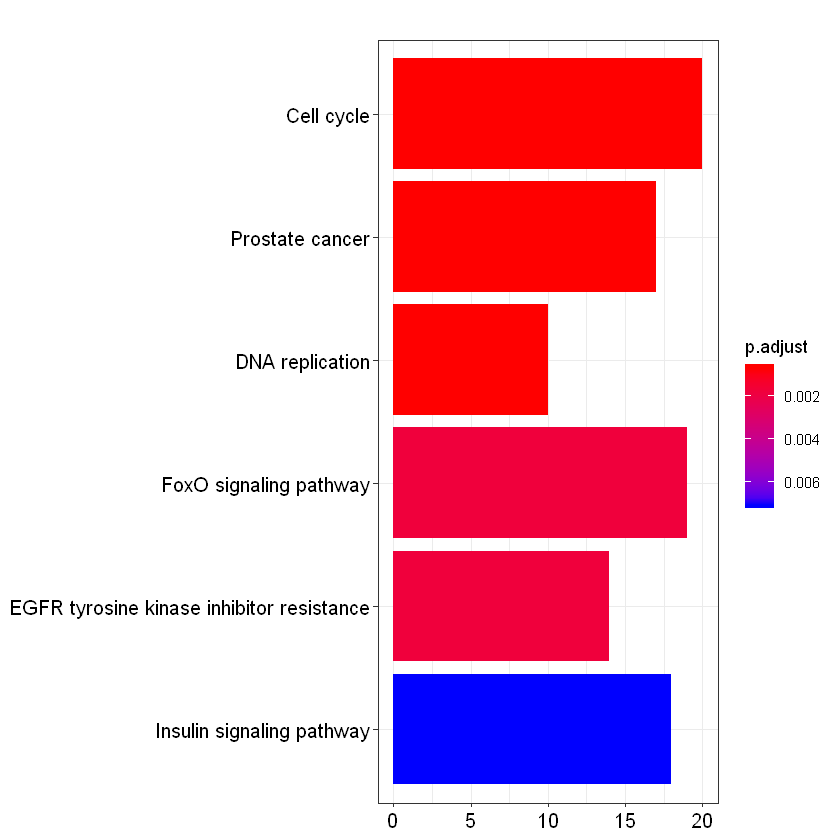

In [20]:
barplot(kegg_enrichment) 

## 4. GO Annotation and enrichment

In [23]:
BiocManager::install("GO.db")

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'GO.db'

installing the source package 'GO.db'


Warning message in install.packages(...):
"installation of package 'GO.db' had non-zero exit status"
Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'



In [1]:
BiocManager::install(c("topGO", "ALL"))

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'topGO', 'ALL'



package 'topGO' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpwhUvtp\downloaded_packages


installing the source package 'ALL'


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'



In [3]:
library(org.Hs.eg.db) # loads the library
myEIDs <- c("1", "10", "100") # Create vecotor of input Entrez IDs
myGO <- unlist(org.Hs.egGO[[as.character(myEIDs[1])]])
myGO_All <- mget(myEIDs, org.Hs.egGO)  # find the GO annotation for each of our genes
myGO_All[[1]]

$`GO:0002576`
$`GO:0002576`$GOID
[1] "GO:0002576"

$`GO:0002576`$Evidence
[1] "TAS"

$`GO:0002576`$Ontology
[1] "BP"


$`GO:0008150`
$`GO:0008150`$GOID
[1] "GO:0008150"

$`GO:0008150`$Evidence
[1] "ND"

$`GO:0008150`$Ontology
[1] "BP"


$`GO:0043312`
$`GO:0043312`$GOID
[1] "GO:0043312"

$`GO:0043312`$Evidence
[1] "TAS"

$`GO:0043312`$Ontology
[1] "BP"


$`GO:0005576`
$`GO:0005576`$GOID
[1] "GO:0005576"

$`GO:0005576`$Evidence
[1] "HDA"

$`GO:0005576`$Ontology
[1] "CC"


$`GO:0005576`
$`GO:0005576`$GOID
[1] "GO:0005576"

$`GO:0005576`$Evidence
[1] "IDA"

$`GO:0005576`$Ontology
[1] "CC"


$`GO:0005576`
$`GO:0005576`$GOID
[1] "GO:0005576"

$`GO:0005576`$Evidence
[1] "TAS"

$`GO:0005576`$Ontology
[1] "CC"


$`GO:0005615`
$`GO:0005615`$GOID
[1] "GO:0005615"

$`GO:0005615`$Evidence
[1] "HDA"

$`GO:0005615`$Ontology
[1] "CC"


$`GO:0031093`
$`GO:0031093`$GOID
[1] "GO:0031093"

$`GO:0031093`$Evidence
[1] "TAS"

$`GO:0031093`$Ontology
[1] "CC"


$`GO:0034774`
$`GO:0034774`$GOID
[1] "GO:0034774"

$`GO:0034774`$Evidence
[1] "TAS"

$`GO:0034774`$Ontology
[1] "CC"


$`GO:0062023`
$`GO:0062023`$GOID
[1] "GO:0062023"

$`GO:0062023`$Evidence
[1] "HDA"

$`GO:0062023`$Ontology
[1] "CC"


$`GO:0070062`
$`GO:0070062`$GOID
[1] "GO:0070062"

$`GO:0070062`$Evidence
[1] "HDA"

$`GO:0070062`$Ontology
[1] "CC"


$`GO:0072562`
$`GO:0072562`$GOID
[1] "GO:0072562"

$`GO:0072562`$Evidence
[1] "HDA"

$`GO:0072562`$Ontology
[1] "CC"


$`GO:1904813`
$`GO:1904813`$GOID
[1] "GO:1904813"

$`GO:1904813`$Evidence
[1] "TAS"

$`GO:1904813`$Ontology
[1] "CC"


$`GO:0003674`
$`GO:0003674`$GOID
[1] "GO:0003674"

$`GO:0003674`$Evidence
[1] "ND"

$`GO:0003674`$Ontology
[1] "MF"

In [4]:
GOgenes <- org.Hs.egGO2ALLEGS[["GO:0008150"]] #perform the mapping in the reverse manner, from GO ID to Entrez genes
head(GOgenes)

ND TAS IDA IEA TAS TAS 
"1" "1" "2" "2" "2" "9"

In [ ]:
GOgenes_All <- mget("GO:0008150", org.Hs.egGO2ALLEGS) # To get genes for the input GO terms
head(GOgenes_All)  ### too many

### "Enrichment"

In [5]:
library(topGO) # loads the data library
library(ALL) # loads the data library

Loading required package: graph

Loading required package: GO.db



Loading required package: SparseM


Attaching package: 'SparseM'


The following object is masked from 'package:base':

    backsolve



groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.


Attaching package: 'topGO'


The following object is masked from 'package:IRanges':

    members




In [7]:
BiocManager::install("hgu95av2.db")

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'hgu95av2.db'

installing the source package 'hgu95av2.db'


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'



In [8]:
library(hgu95av2.db)

In [9]:
data(ALL)
data(geneList)
affyLib <-paste(annotation(ALL), "db", sep=".")
library(package=affyLib, character.only=TRUE)

# check how many genes can be considered as DE genes (p-value < 0.01) from the geneList data for GO enrichment
sum(topDiffGenes(geneList)) 

[1] 50

In [10]:
myGOData <- new("topGOdata", 
                ontology="BP", 
                allGenes=geneList, 
                geneSel=topDiffGenes,
                nodeSize=10, 
                annot= annFUN.db, 
                affyLib=affyLib)   # create a `topGOdata` object
Myenrichment_Fisher <- runTest(myGOData, 
                               algorithm= "classic", 
                               statistic="fisher")
Myenrichment_Fisher      #enrichment test (Fisher test) 


Building most specific GOs .....

Warning message in result_fetch(res@ptr, n = n):
"SQL statements must be issued with dbExecute() or dbSendStatement() instead of dbGetQuery() or dbSendQuery()."
	( 1598 GO terms found. )


Build GO DAG topology ..........

	( 4474 GO terms and 10284 relations. )


Annotating nodes ...............

	( 309 genes annotated to the GO terms. )


			 -- Classic Algorithm -- 

		 the algorithm is scoring 964 nontrivial nodes
		 parameters: 
			 test statistic: fisher




Description:  
Ontology: BP 
'classic' algorithm with the 'fisher' test
1072 GO terms scored: 45 terms with p < 0.01
Annotation data:
    Annotated genes: 309 
    Significant genes: 45 
    Min. no. of genes annotated to a GO: 10 
    Nontrivial nodes: 964 

In [11]:
score(Myenrichment_Fisher) # Displays p values for every GO term
geneData(Myenrichment_Fisher) # A table showing Medata data for enrichment

GO:0000003   GO:0000018   GO:0000070   GO:0000075   GO:0000077   GO:0000079 
9.655461e-01 1.239518e-02 9.886835e-01 7.657002e-01 6.712692e-01 5.893578e-01 
  GO:0000082   GO:0000086   GO:0000122   GO:0000165   GO:0000187   GO:0000209 
9.615232e-01 2.800021e-01 5.423813e-01 8.414817e-01 5.423813e-01 5.893578e-01 
  GO:0000226   GO:0000278   GO:0000280   GO:0000302   GO:0000723   GO:0000819 
9.723434e-01 9.786789e-01 9.969679e-01 8.951615e-01 8.283711e-01 9.937492e-01 
  GO:0000902   GO:0000910   GO:0001501   GO:0001516   GO:0001525   GO:0001568 
9.544560e-01 6.320211e-01 2.053321e-01 2.469707e-01 1.030177e-01 1.816340e-01 
  GO:0001667   GO:0001676   GO:0001775   GO:0001776   GO:0001816   GO:0001817 
3.837588e-03 1.756228e-02 1.326230e-01 4.414311e-01 3.763549e-02 3.763549e-02 
  GO:0001818   GO:0001819   GO:0001906   GO:0001909   GO:0001932   GO:0001933 
8.337637e-02 9.864475e-02 2.742155e-02 1.239518e-02 4.433533e-01 2.014489e-01 
  GO:0001934   GO:0001944   GO:0001959   GO:0002009   GO:0002200   GO:0002204 
6.215233e-01 1.816340e-01 1.303473e-01 9.247527e-01 4.263962e-02 4.263962e-02 
  GO:0002208   GO:0002237   GO:0002250   GO:0002252   GO:0002260   GO:0002263 
4.263962e-02 7.961629e-01 1.584909e-01 4.093371e-02 4.414311e-01 1.848437e-01 
  GO:0002274   GO:0002275   GO:0002283   GO:0002285   GO:0002312   GO:0002366 
4.185803e-01 1.485845e-01 1.247996e-01 6.597243e-02 4.263962e-02 1.848437e-01 
  GO:0002367   GO:0002376   GO:0002377   GO:0002381   GO:0002440   GO:0002443 
6.320211e-01 3.841418e-01 8.041618e-02 4.263962e-02 4.202833e-02 3.588491e-01 
  GO:0002444   GO:0002446   GO:0002449   GO:0002460   GO:0002520   GO:0002521 
1.485845e-01 1.247996e-01 1.167056e-01 1.742005e-01 2.800021e-01 6.454320e-02 
  GO:0002562   GO:0002576   GO:0002637   GO:0002682   GO:0002683   GO:0002684 
4.263962e-02 7.979644e-01 5.992216e-02 4.780263e-02 2.052485e-02 5.238341e-02 
  GO:0002685   GO:0002687   GO:0002694   GO:0002695   GO:0002696   GO:0002697 
5.893578e-01 8.283711e-01 2.611265e-02 4.263962e-02 2.719517e-02 5.303939e-02 
  GO:0002699   GO:0002700   GO:0002702   GO:0002703   GO:0002705   GO:0002706 
8.155584e-02 1.759910e-02 2.742155e-02 2.014489e-01 1.485845e-01 1.485845e-01 
  GO:0002708   GO:0002712   GO:0002714   GO:0002718   GO:0002764   GO:0002768 
1.485845e-01 1.039693e-01 1.039693e-01 4.414311e-01 3.240651e-03 3.240651e-03 
  GO:0002790   GO:0002791   GO:0002793   GO:0002819   GO:0002821   GO:0002822 
5.423813e-01 3.769087e-01 5.432829e-01 2.576162e-01 2.232610e-01 2.232610e-01 
  GO:0002824   GO:0002889   GO:0002891   GO:0003006   GO:0003008   GO:0006082 
2.232610e-01 1.039693e-01 1.039693e-01 9.465040e-01 9.768880e-01 2.884339e-02 
  GO:0006139   GO:0006259   GO:0006260   GO:0006261   GO:0006275   GO:0006281 
9.523815e-02 4.061788e-01 9.067225e-01 7.398448e-01 8.780410e-01 4.739544e-01 
  GO:0006310   GO:0006325   GO:0006351   GO:0006355   GO:0006357   GO:0006366 
1.236183e-02 9.725903e-01 1.890027e-01 1.682496e-01 5.483895e-01 5.266975e-01 
  GO:0006396   GO:0006412   GO:0006464   GO:0006468   GO:0006470   GO:0006497 
8.416992e-01 4.263962e-02 9.048701e-01 8.159987e-01 3.230891e-02 6.712692e-01 
  GO:0006505   GO:0006506   GO:0006508   GO:0006511   GO:0006518   GO:0006629 
6.320211e-01 6.320211e-01 9.946524e-01 8.246564e-01 1.303473e-01 2.945015e-01 
  GO:0006631   GO:0006633   GO:0006636   GO:0006643   GO:0006644   GO:0006650 
3.149436e-02 1.399293e-02 8.704560e-03 8.609210e-01 3.453494e-01 8.407086e-01 
  GO:0006656   GO:0006661   GO:0006664   GO:0006690   GO:0006692   GO:0006693 
5.893578e-01 6.811606e-01 6.320211e-01 4.802245e-02 1.592533e-01 1.592533e-01 
  GO:0006725   GO:0006793   GO:0006796   GO:0006807   GO:0006810   GO:0006811 
9.523815e-02 7.195943e-01 7.195943e-01 1.487627e-01 8.687000e-02 4.202833e-02 
  GO:0006812   GO:0006873   GO:0006874   GO:0006875   GO:0006886   GO:0006887 
1.592533e-01 1.656748e-01 1.656748e-01 1.656748e-01 7.398448e-01 1.636397e-01 
  GO:0006897   GO:0006898   GO:0006909   GO:0006915 

Annotated Significant    NodeSize    SigTerms 
        309          45          10         964

In [12]:
Myenrichment_KS <- runTest(myGOData, 
                           algorithm= "classic", 
                           statistic="ks")
enrich_table <-GenTable(myGOData, 
                        classicFisher=Myenrichment_Fisher,
                        topNodes = 20)
head(enrich_table) # get the enrichment results as table


			 -- Classic Algorithm -- 

		 the algorithm is scoring 1072 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing



,GO.ID,Term,Annotated,Significant,Expected,classicFisher
,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,GO:0031668,cellular response to extracellular stimu...,12,8,1.75,3.6e-05
2,GO:0030334,regulation of cell migration,44,16,6.41,7.0e-05
3,GO:0051239,regulation of multicellular organismal p...,86,24,12.52,7.8e-05
4,GO:0009991,response to extracellular stimulus,20,10,2.91,0.00010
5,GO:2000145,regulation of cell motility,46,16,6.70,0.00013
6,GO:0010634,positive regulation of epithelial cell m...,17,9,2.48,0.00014


Loading required package: Rgraphviz

Loading required package: grid


Attaching package: 'grid'


The following object is masked from 'package:topGO':

    depth



Attaching package: 'Rgraphviz'


The following objects are masked from 'package:IRanges':

    from, to


The following objects are masked from 'package:S4Vectors':

    from, to




$dag
A graphNEL graph with directed edges
Number of Nodes = 25 
Number of Edges = 40 

$complete.dag
[1] "A graph with 25 nodes."


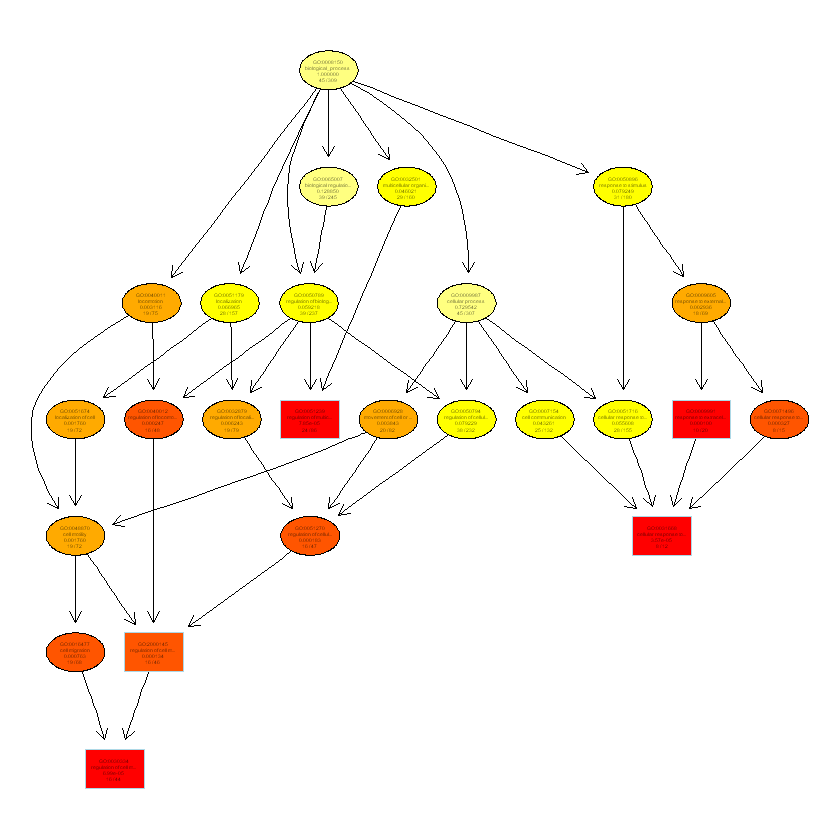

In [13]:
showSigOfNodes(myGOData, score(Myenrichment_Fisher), firstSigNodes=5, useInfo="all") # Plot the enrichment GO graph

### 5. Handle annotation


In [14]:
BiocManager::install("hgu133a.db")
library(hgu133a.db)

# `hgu133a.db` is the chip annotation package for Affymetrix Human Genome U133 Set, 
# which contains mappings between an Affymetrix's identifiers and accessions. 

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'hgu133a.db'

installing the source package 'hgu133a.db'


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'





In [15]:
mymap <- hgu133aENTREZID 
mymap

# `hgu133aENTREZID` provides mappings of manufacturer identifiers to a vector of entrez gene identifiers.
# mymap shows a map between ENtrez ids and probes, the mapped probes.

ENTREZID map for chip hgu133a (object of class "ProbeAnnDbBimap")

In [16]:
mapped_probes <- mappedkeys(mymap)
mapped_probes

# this shows a list of mapped probes.
# 'mappedkeys' function gets the probe identifiers that are mapped to a entrez gene id as an object and later the selected IDs 
# can be extracted.

[1] "1053_at"                     "117_at"                     
    [3] "121_at"                      "1255_g_at"                  
    [5] "1316_at"                     "1320_at"                    
    [7] "1405_i_at"                   "1431_at"                    
    [9] "1438_at"                     "1487_at"                    
   [11] "1494_f_at"                   "1598_g_at"                  
   [13] "160020_at"                   "1729_at"                    
   [15] "177_at"                      "179_at"                     
   [17] "1861_at"                     "200000_s_at"                
   [19] "200001_at"                   "200002_at"                  
   [21] "200004_at"                   "200005_at"                  
   [23] "200006_at"                   "200007_at"                  
   [25] "200008_s_at"                 "200009_at"                  
   [27] "200010_at"                   "200011_s_at"                
   [29] "200013_at"                   "200014_s_at"                
   [31] "200015_s_at"                 "200017_at"                  
   [33] "200019_s_at"                 "200020_at"                  
   [35] "200021_at"                   "200022_at"                  
   [37] "200023_s_at"                 "200024_at"                  
   [39] "200025_s_at"                 "200026_at"                  
   [41] "200027_at"                   "200028_s_at"                
   [43] "200029_at"                   "200030_s_at"                
   [45] "200032_s_at"                 "200034_s_at"                
   [47] "200035_at"                   "200036_s_at"                
   [49] "200037_s_at"                 "200039_s_at"                
   [51] "200040_at"                   "200042_at"                  
   [53] "200043_at"                   "200045_at"                  
   [55] "200046_at"                   "200047_s_at"                
   [57] "200048_s_at"                 "200049_at"                  
   [59] "200050_at"                   "200051_at"                  
   [61] "200052_s_at"                 "200053_at"                  
   [63] "200054_at"                   "200055_at"                  
   [65] "200056_s_at"                 "200057_s_at"                
   [67] "200059_s_at"                 "200060_s_at"                
   [69] "200061_s_at"                 "200062_s_at"                
   [71] "200063_s_at"                 "200064_at"                  
   [73] "200066_at"                   "200067_x_at"                
   [75] "200068_s_at"                 "200069_at"                  
   [77] "200070_at"                   "200071_at"                  
   [79] "200072_s_at"                 "200073_s_at"                
   [81] "200074_s_at"                 "200075_s_at"                
   [83] "200076_s_at"                 "200077_s_at"                
   [85] "200078_s_at"                 "200079_s_at"                
   [87] "200081_s_at"                 "200082_s_at"                
   [89] "200083_at"                   "200084_at"                  
   [91] "200085_s_at"                 "200086_s_at"                
   [93] "200087_s_at"                 "200090_at"                  
   [95] "200091_s_at"                 "200092_s_at"                
   [97] "200093_s_at"                 "200094_s_at"                
   [99] "200095_x_at"                 "200096_s_at"                
  [101] "200097_s_at"                 "200098_s_at"                
  [103] "200593_s_at"                 "200594_x_at"                
  [105] "200595_s_at"                 "200596_s_at"                
  [107] "200597_at"                   "200600_at"                  
  [109] "200601_at"                   "200602_at"                  
  [111] "200603_at"                   "200604_s_at"                
  [113] "200605_s_at"                 "200606_at"                  
  [115] "200607_s_at"                 "200608_s_at"                
  [117] "200609_s_at"                 "200610_s_at"         

In [17]:
myentrez <- as.list(mymap[mapped_probes[1:5]])
myentrez

# myentrez shows the first five entrez ids (mapped_probes) extracted in the mapped_probes list
# another way to extract entrez ids:
mylength = 3          # for entire list, 'mylength = length(myentrez)'
for(i in 1: mylength){
    myentrez[[i]]
}
# be sure that `mylength` is less than 'length(myentrez)'

$`1053_at`
[1] "5982"

$`117_at`
[1] "3310"

$`121_at`
[1] "7849"

$`1255_g_at`
[1] "2978"

$`1316_at`
[1] "7067"

In [18]:
ls("package:hgu133a.db")
# check the 'hgu133a.db' package
# 'ls("package:<package_name>") is used to have an overview of all possible mappings in the package.

[1] "hgu133a"              "hgu133a.db"           "hgu133a_dbconn"      
 [4] "hgu133a_dbfile"       "hgu133a_dbInfo"       "hgu133a_dbschema"    
 [7] "hgu133aACCNUM"        "hgu133aALIAS2PROBE"   "hgu133aCHR"          
[10] "hgu133aCHRLENGTHS"    "hgu133aCHRLOC"        "hgu133aCHRLOCEND"    
[13] "hgu133aENSEMBL"       "hgu133aENSEMBL2PROBE" "hgu133aENTREZID"     
[16] "hgu133aENZYME"        "hgu133aENZYME2PROBE"  "hgu133aGENENAME"     
[19] "hgu133aGO"            "hgu133aGO2ALLPROBES"  "hgu133aGO2PROBE"     
[22] "hgu133aMAP"           "hgu133aMAPCOUNTS"     "hgu133aOMIM"         
[25] "hgu133aORGANISM"      "hgu133aORGPKG"        "hgu133aPATH"         
[28] "hgu133aPATH2PROBE"    "hgu133aPFAM"          "hgu133aPMID"         
[31] "hgu133aPMID2PROBE"    "hgu133aPROSITE"       "hgu133aREFSEQ"       
[34] "hgu133aSYMBOL"        "hgu133aUNIGENE"       "hgu133aUNIPROT"